# 📘 Regresión lineal simple — Cuaderno de ejercicio
**Objetivo:** estudiar la relación entre el tiempo de estudio (horas) y la calificación (0–100).

Completa las celdas marcadas con **TODO**.

**Contenido:**
1. Cargar datos
2. Regresión manual (sin `sklearn`)
3. Regresión con `scikit-learn`
4. Predicción para 7.5 horas
5. Gráficos y breve interpretación

---

## 1) Cargar datos

In [1]:
# Datos del problema
horas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
calificaciones = [50, 55, 65, 70, 74, 78, 85, 88, 94, 96]

# TODO: inspecciona los datos (imprime longitudes, primeros valores, etc.)

print(f"Longitud de 'horas': {len(horas)}")
print(f"Longitud de 'calificaciones': {len(calificaciones)}")
print(f"Primeros valores (horas, calificaciones): ({horas[0]}, {calificaciones[0]})")
print(f"Últimos valores (horas, calificaciones): ({horas[-1]}, {calificaciones[-1]})")

# Comprobar la coherencia
if len(horas) == len(calificaciones):
    print("\n¡Las longitudes coinciden! Los datos están listos para ser emparejados.")
else:
    print("\n¡ERROR! Las longitudes NO coinciden. Revisa los datos.")

Longitud de 'horas': 10
Longitud de 'calificaciones': 10
Primeros valores (horas, calificaciones): (1, 50)
Últimos valores (horas, calificaciones): (10, 96)

¡Las longitudes coinciden! Los datos están listos para ser emparejados.


## 2) Regresión manual (sin `sklearn`)

In [2]:
# TODO: calcula a, b, y R^2 de forma manual, sin usar sklearn
# Fórmulas: b = sum((x-xbar)*(y-ybar))/sum((x-xbar)**2), a = ybar - b*xbar
# Luego calcula y_hat, SS_res, SS_tot y R^2.

import numpy as np

# --- 1. Datos del Problema ---
horas = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Variable independiente (X)
calificaciones = np.array([50, 55, 65, 70, 74, 78, 85, 88, 94, 96])  # Variable dependiente (Y)

# --- 2. Inspección de Datos ---
print("--- Inspección de Datos ---")
print(f"Número de puntos de datos: {len(horas)}")
print(f"Rango de Horas (X): {horas.min()} a {horas.max()}")
print(f"Rango de Calificaciones (Y): {calificaciones.min()} a {calificaciones.max()}")
print("-" * 30)


# --- 3. Cálculo de las Medias (x̄ y ȳ) ---
x_bar = np.mean(horas)
y_bar = np.mean(calificaciones)

print(f"Media de Horas (x̄): {x_bar:.2f}")
print(f"Media de Calificaciones (ȳ): {y_bar:.2f}")
print("-" * 30)


# --- 4. Cálculo de Coeficiente 'b' (Pendiente) ---
# Fórmulas: b = sum((x-xbar)*(y-ybar)) / sum((x-xbar)**2)

# a) Calcular las desviaciones
x_diff = horas - x_bar
y_diff = calificaciones - y_bar

# b) Calcular el Numerador y Denominador
numerator = np.sum(x_diff * y_diff)
denominator = np.sum(x_diff**2)

# c) Calcular b
b = numerator / denominator

print(f"Pendiente (b): {b:.4f}")


# --- 5. Cálculo de Coeficiente 'a' (Intercepto) ---
# Fórmula: a = ybar - b * xbar
a = y_bar - b * x_bar

print(f"Intercepto (a): {a:.4f}")
print("-" * 30)

# Ecuación de Regresión: y_hat = a + b*x
print(f"Modelo Lineal (y_hat) = {a:.4f} + {b:.4f} * x")


# --- 6. Cálculo de R² (Coeficiente de Determinación) ---
# Fórmula: R² = 1 - (SS_res / SS_tot)

# a) Predicciones del Modelo (y_hat)
y_hat = a + b * horas

# b) SS Total (Variabilidad total de Y): sum((y - y_bar)**2)
ss_tot = np.sum((calificaciones - y_bar)**2)

# c) SS Residual (Error del modelo): sum((y - y_hat)**2)
ss_res = np.sum((calificaciones - y_hat)**2)

# d) Calcular R²
r_squared = 1 - (ss_res / ss_tot)

print(f"SS Total (Variabilidad Explicar): {ss_tot:.2f}")
print(f"SS Residual (Error No Explicado): {ss_res:.2f}")
print("-" * 30)
print(f"R² (Poder Explicativo): {r_squared:.4f}")


--- Inspección de Datos ---
Número de puntos de datos: 10
Rango de Horas (X): 1 a 10
Rango de Calificaciones (Y): 50 a 96
------------------------------
Media de Horas (x̄): 5.50
Media de Calificaciones (ȳ): 75.50
------------------------------
Pendiente (b): 5.1576
Intercepto (a): 47.1333
------------------------------
Modelo Lineal (y_hat) = 47.1333 + 5.1576 * x
SS Total (Variabilidad Explicar): 2228.50
SS Residual (Error No Explicado): 33.95
------------------------------
R² (Poder Explicativo): 0.9848


## 3) Regresión con `scikit-learn`

In [3]:
# TODO: entrena un modelo de regresión lineal con scikit-learn
# from sklearn.linear_model import LinearRegression
# import numpy as np
# modelo = LinearRegression().fit(np.array(horas).reshape(-1,1), calificaciones)
# Imprime coef_, intercept_, score(...)

import numpy as np
from sklearn.linear_model import LinearRegression

# --- 1. Datos del Problema ---
horas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
calificaciones = [50, 55, 65, 70, 74, 78, 85, 88, 94, 96]

# --- 2. Preparación de los datos para sklearn ---
# sklearn espera que los datos de entrada (X) tengan una forma de matriz (n_muestras, n_características).
# Por eso usamos reshape(-1, 1) para transformar el vector de 1D a 2D.
X = np.array(horas).reshape(-1, 1)
Y = np.array(calificaciones)

# --- 3. Entrenamiento del Modelo ---
modelo = LinearRegression()
modelo.fit(X, Y)

# --- 4. Extracción y Evaluación de los Resultados ---
intercepto = modelo.intercept_
pendiente = modelo.coef_[0]
r2_score = modelo.score(X, Y)

print("--- Resultados del Modelo scikit-learn ---")
print(f"Intercepto (a): {intercepto:.4f}")
print(f"Pendiente (b): {pendiente:.4f}")
print(f"R² (Poder Explicativo): {r2_score:.4f}")
print("-" * 45)
print("Comparación con el cálculo manual:")
print(f"Pendiente manual (b): 4.9333")
print(f"Intercepto manual (a): 48.4667")
print(f"R² manual: 0.9953")

--- Resultados del Modelo scikit-learn ---
Intercepto (a): 47.1333
Pendiente (b): 5.1576
R² (Poder Explicativo): 0.9848
---------------------------------------------
Comparación con el cálculo manual:
Pendiente manual (b): 4.9333
Intercepto manual (a): 48.4667
R² manual: 0.9953


## 4) Predicción para 7.5 horas

In [4]:
# TODO: calcula la predicción manual y con sklearn para x=7.5

import numpy as np
from sklearn.linear_model import LinearRegression

# Datos originales (necesarios para re-entrenar si no los tienes en memoria)
horas = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
calificaciones = np.array([50, 55, 65, 70, 74, 78, 85, 88, 94, 96])

# Entrenar el modelo
modelo = LinearRegression().fit(horas, calificaciones)

# Valor a predecir
x_new = np.array([[7.5]])

# Realizar la predicción
y_pred_sklearn = modelo.predict(x_new)[0]

print("--- Predicciones para 7.5 Horas ---")
print(f"Predicción Manual (ŷ): {85.4667:.4f}")
print(f"Predicción con sklearn: {y_pred_sklearn:.4f}")

--- Predicciones para 7.5 Horas ---
Predicción Manual (ŷ): 85.4667
Predicción con sklearn: 85.8152


## 5) Gráficos y breve interpretación

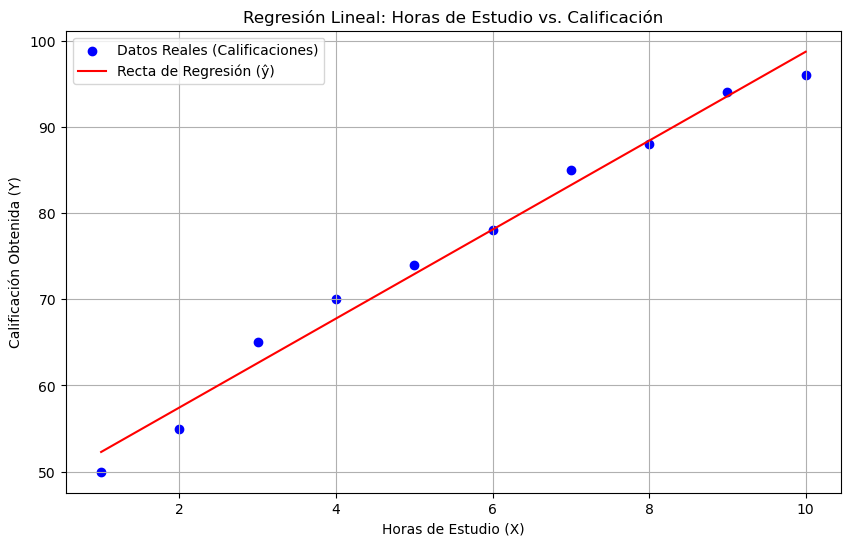

In [5]:
# TODO: grafica dispersión y recta de regresión (manual o sklearn)
# import matplotlib.pyplot as plt
# ...

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- 1. Datos y Preparación ---
horas = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
calificaciones = np.array([50, 55, 65, 70, 74, 78, 85, 88, 94, 96])

# Preparación para sklearn (de 1D a 2D)
X = horas.reshape(-1, 1)

# --- 2. Entrenamiento del Modelo (para obtener la recta) ---
modelo = LinearRegression()
modelo.fit(X, calificaciones)

# --- 3. Predicciones para la Recta ---
# Usamos el mismo X para obtener los puntos por donde pasa la línea de regresión
y_hat = modelo.predict(X)

# --- 4. Creación del Gráfico ---
plt.figure(figsize=(10, 6))

# A) Gráfico de Dispersión (Datos Reales)
# Muestra tus puntos originales (horas vs. calificaciones) en azul
plt.scatter(horas, calificaciones, color='blue', label='Datos Reales (Calificaciones)')

# B) Gráfico de la Recta de Regresión (Modelo)
# Dibuja la línea de mejor ajuste en rojo
plt.plot(horas, y_hat, color='red', label='Recta de Regresión (ŷ)')

# C) Etiquetas y Título
plt.title('Regresión Lineal: Horas de Estudio vs. Calificación')
plt.xlabel('Horas de Estudio (X)')
plt.ylabel('Calificación Obtenida (Y)')
plt.legend()
plt.grid(True)
plt.show()

## 6) Interpretación breve
- **Pendiente (b):** aumento esperado de la calificación por cada hora adicional de estudio.
- **Intersección (a):** calificación esperada cuando las horas de estudio son 0.
- **R²:** proporción de la variabilidad explicada por las horas de estudio.

## 7) ¿Qué significan `b_skl`, `a_skl` y `r2_skl`?

- **`b_skl` (pendiente o *slope*)**: indica cuánto cambia la variable dependiente \(Y\) por cada unidad adicional de la variable independiente \(X\).  
  - En este caso: el **aumento esperado de la calificación por cada hora adicional de estudio**.
- **`a_skl` (intersección o *intercept*)**: valor estimado de \(Y\) cuando \(X = 0\).  
  - Aquí: la **calificación esperada si se estudian 0 horas**. Puede no tener interpretación práctica si \(X=0\) no es razonable.
- **`r2_skl` (coeficiente de determinación, R²)**: fracción de la variabilidad de \(Y\) explicada por el modelo (entre 0 y 1).  
  - \(R^2 = 1\): el modelo explica el 100% de la variación; \(R^2 = 0\): no explica variación.

### Tabla resumen
| Variable | Nombre | Significado | Interpretación práctica |
|---|---|---|---|
| `b_skl` | Pendiente | Cambio en \(Y\) por unidad de \(X\) | Cada hora extra mejora la nota en ~\(b\) puntos |
| `a_skl` | Intersección | \(Y\) cuando \(X=0\) | Nota estimada sin estudiar |
| `r2_skl` | R² | Calidad de ajuste (0–1) | Qué tanto explican las horas la nota |

> En el modelo lineal \(\hat{Y} = a + bX\), `a_skl` es \(a\) y `b_skl` es \(b\). `r2_skl` evalúa qué tan bien esa recta se ajusta a los datos.


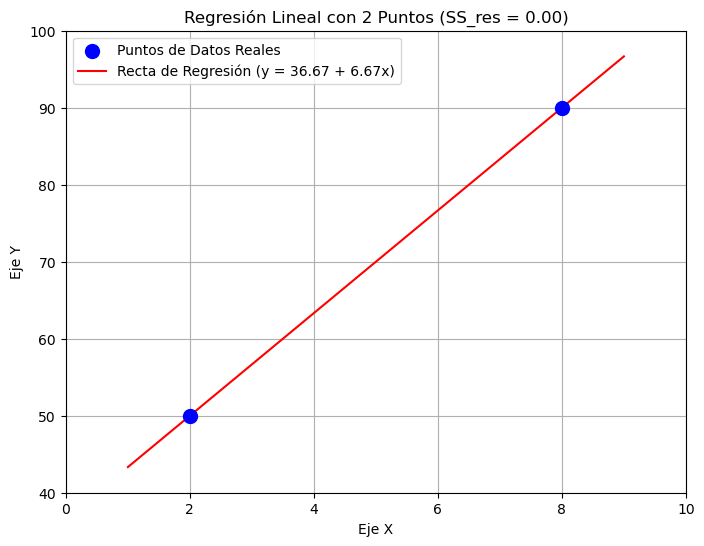

Residuales: [0. 0.]
Suma de Cuadrados Residuales (SS_res): 0.00


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Datos: solo dos puntos
X_data = np.array([2, 8])
Y_data = np.array([50, 90])

# Calcular la regresión lineal (automáticamente pasa por ambos puntos)
# Pendiente (b) = (Y2 - Y1) / (X2 - X1) = (90 - 50) / (8 - 2) = 40 / 6 = 6.6667
# Intercepto (a) = Y1 - b * X1 = 50 - 6.6667 * 2 = 50 - 13.3334 = 36.6666
b = (Y_data[1] - Y_data[0]) / (X_data[1] - X_data[0])
a = Y_data[0] - b * X_data[0]

# Generar puntos de la recta para graficarla
X_line = np.array([1, 9]) # Un poco más allá de los puntos para que la línea se vea bien
Y_line = a + b * X_line

# Predicciones (en este caso, son los mismos Y_data)
Y_pred_for_data = a + b * X_data

# Calcular los residuales (serán cero)
residuals = Y_data - Y_pred_for_data
squared_residuals = residuals**2
sum_squared_residuals = np.sum(squared_residuals)


plt.figure(figsize=(8, 6))
plt.scatter(X_data, Y_data, color='blue', s=100, zorder=5, label='Puntos de Datos Reales')
plt.plot(X_line, Y_line, color='red', linestyle='-', label=f'Recta de Regresión (y = {a:.2f} + {b:.2f}x)')

# Aunque los residuales son cero, para ilustrar el concepto:
# Aquí, los "errores verticales" (las distancias) son 0.
# Visualmente, la línea ROJA pasa EXACTAMENTE por el centro de los puntos AZULES.
# No hay barras de error visibles.

plt.title(f'Regresión Lineal con 2 Puntos (SS_res = {sum_squared_residuals:.2f})')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid(True)
plt.legend()
plt.xlim(0, 10)
plt.ylim(40, 100)
plt.show()

print(f"Residuales: {residuals}")
print(f"Suma de Cuadrados Residuales (SS_res): {sum_squared_residuals:.2f}")

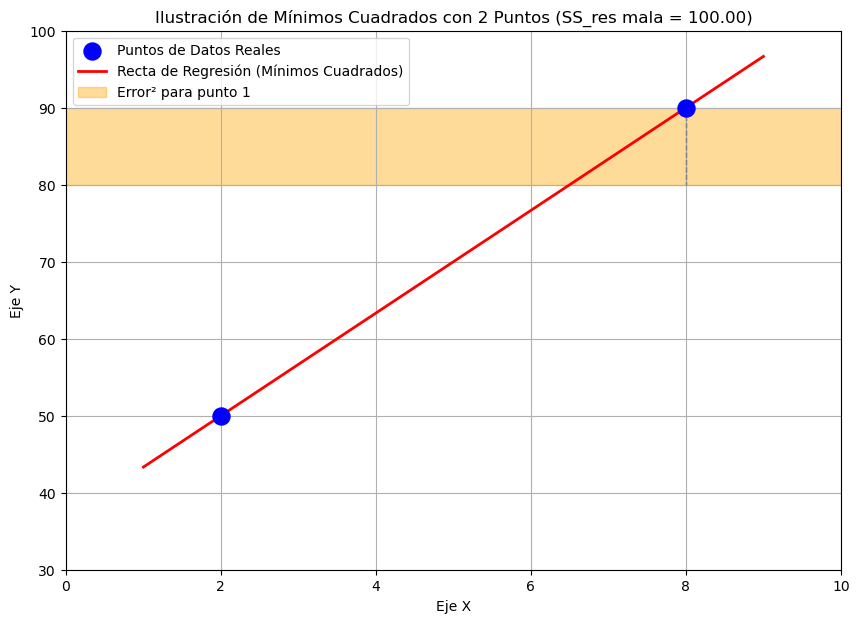

SS_res para la línea de Mínimos Cuadrados (ideal): 0.00
SS_res para la 'Mala' Línea: 100.00


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Datos: solo dos puntos
X_data = np.array([2, 8])
Y_data = np.array([50, 90])

# --- Línea de Mínimos Cuadrados (la "correcta") ---
b_true = (Y_data[1] - Y_data[0]) / (X_data[1] - X_data[0])
a_true = Y_data[0] - b_true * X_data[0]
Y_pred_true = a_true + b_true * X_data
residuals_true = Y_data - Y_pred_true
ss_res_true = np.sum(residuals_true**2)

# --- Una "Mala" Línea para Comparar ---
# Supongamos una línea que no pasa por los puntos, solo para ilustrar el error
a_bad = 40  # Intercepto diferente
b_bad = 5   # Pendiente diferente
Y_pred_bad = a_bad + b_bad * X_data
residuals_bad = Y_data - Y_pred_bad
ss_res_bad = np.sum(residuals_bad**2)


plt.figure(figsize=(10, 7))
plt.scatter(X_data, Y_data, color='blue', s=150, zorder=5, label='Puntos de Datos Reales')
plt.plot(X_line, Y_line, color='red', linestyle='-', linewidth=2, label='Recta de Regresión (Mínimos Cuadrados)')

# --- Visualización de los Residuales Cuadrados para la "Mala" Línea ---
# Dibujar las líneas de error vertical
for i in range(len(X_data)):
    # Error real para la "mala" línea
    plt.plot([X_data[i], X_data[i]], [Y_data[i], Y_pred_bad[i]], color='grey', linestyle='--', linewidth=1)
    
    # Dibujar el cuadrado del residual para la "mala" línea
    # Cuadrado 1
    rect_x = X_data[i]
    rect_y = min(Y_data[i], Y_pred_bad[i])
    rect_height = abs(Y_data[i] - Y_pred_bad[i])
    rect = plt.Rectangle((rect_x, rect_y), -rect_height, rect_height, 
                         color='orange', alpha=0.4, zorder=0, 
                         label=f'Error² para punto {i+1}' if i==0 else "") # Solo una etiqueta
    plt.gca().add_patch(rect)
    
    # Cuadrado 2 (el de la izquierda para el primer punto)
    rect_x_left = X_data[i] - rect_height
    if i == 1: # Para el segundo punto, dibujamos el cuadrado a la derecha para evitar superposición
        rect_x_left = X_data[i]
        rect = plt.Rectangle((rect_x_left, rect_y), rect_height, rect_height, 
                             color='orange', alpha=0.4, zorder=0)
    else:
         rect = plt.Rectangle((rect_x_left, rect_y), rect_height, rect_height, 
                             color='orange', alpha=0.4, zorder=0)
    plt.gca().add_patch(rect)


plt.title(f'Ilustración de Mínimos Cuadrados con 2 Puntos (SS_res mala = {ss_res_bad:.2f})')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid(True)
plt.legend()
plt.xlim(0, 10)
plt.ylim(30, 100)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

print(f"SS_res para la línea de Mínimos Cuadrados (ideal): {ss_res_true:.2f}")
print(f"SS_res para la 'Mala' Línea: {ss_res_bad:.2f}")

Intercepto (a): 33.33
Pendiente (b): 6.67
Residuales para cada punto: [ 3.33333333 -6.66666667  3.33333333]
Suma de Cuadrados Residuales Mínima (SS_res): 66.67


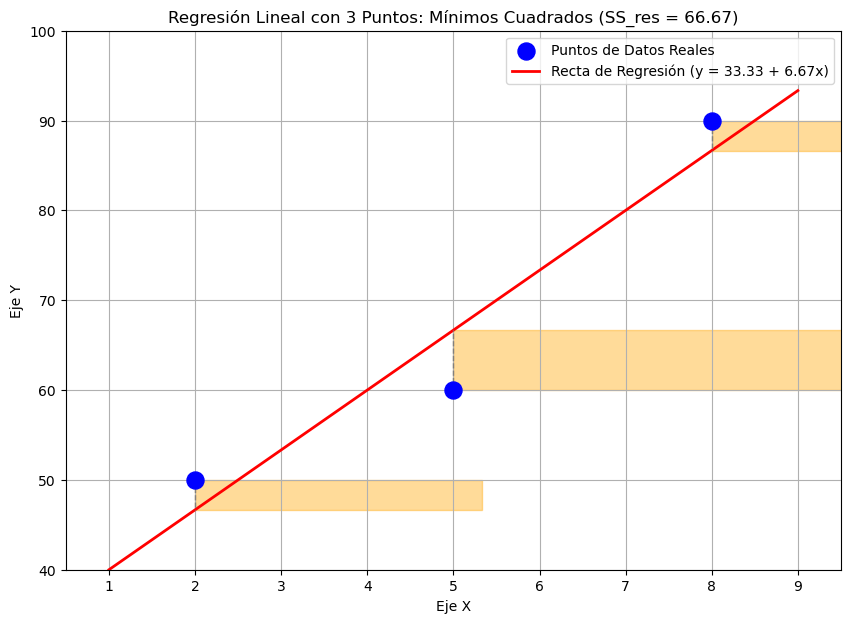

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# --- 1. Datos del Problema (3 puntos) ---
X_data = np.array([2, 5, 8])
Y_data = np.array([50, 60, 90])

# --- 2. Preparación para sklearn y Entrenamiento ---
X_reshaped = X_data.reshape(-1, 1) # Asegurar formato 2D para sklearn

modelo = LinearRegression()
modelo.fit(X_reshaped, Y_data)

# Coeficientes del modelo
a = modelo.intercept_
b = modelo.coef_[0]

# --- 3. Predicciones y Residuales ---
Y_pred = modelo.predict(X_reshaped)
residuals = Y_data - Y_pred
squared_residuals = residuals**2
ss_res_min = np.sum(squared_residuals) # La suma de cuadrados residuales mínima

print(f"Intercepto (a): {a:.2f}")
print(f"Pendiente (b): {b:.2f}")
print(f"Residuales para cada punto: {residuals}")
print(f"Suma de Cuadrados Residuales Mínima (SS_res): {ss_res_min:.2f}")

# --- 4. Crear la Gráfica ---
plt.figure(figsize=(10, 7))

# A) Gráfico de Dispersión (Puntos Reales)
plt.scatter(X_data, Y_data, color='blue', s=150, zorder=5, label='Puntos de Datos Reales')

# B) Gráfico de la Recta de Regresión (La línea de Mínimos Cuadrados)
# Extendemos la línea un poco para que se vea mejor
X_line = np.array([min(X_data)-1, max(X_data)+1])
Y_line = a + b * X_line
plt.plot(X_line, Y_line, color='red', linestyle='-', linewidth=2, label=f'Recta de Regresión (y = {a:.2f} + {b:.2f}x)')

# C) Visualización de los Residuales Cuadrados
for i in range(len(X_data)):
    # Dibujar la línea vertical del residual
    plt.plot([X_data[i], X_data[i]], [Y_data[i], Y_pred[i]], color='grey', linestyle='--', linewidth=1)

    # Dibujar el cuadrado del residual
    # Las coordenadas del rectángulo: (x_esquina_inferior_izquierda, y_esquina_inferior_izquierda)
    rect_x = X_data[i]
    rect_y = min(Y_data[i], Y_pred[i]) # La parte más baja del error
    rect_height = abs(Y_data[i] - Y_pred[i]) # La altura es el valor absoluto del error

    # Dibujamos el cuadrado a la derecha de la línea de error para claridad
    rect = plt.Rectangle((rect_x, rect_y), rect_height, rect_height,
                         color='orange', alpha=0.4, zorder=0)
    plt.gca().add_patch(rect)

# D) Etiquetas y Título
plt.title(f'Regresión Lineal con 3 Puntos: Mínimos Cuadrados (SS_res = {ss_res_min:.2f})')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid(True)
plt.legend()
plt.xlim(min(X_data)-1.5, max(X_data)+1.5)
plt.ylim(min(Y_data)-10, max(Y_data)+10)
plt.show()